In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
print(df.dtypes)
print()
print(df.info())
print()
print(df.shape)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-nu

In [4]:
df.dteday = df.dteday.apply(pd.to_datetime)

In [5]:
def to_ts(row):
    
    return time.mktime(row.dteday.timetuple())

df['timestamp'] = df.apply(to_ts, axis=1)

In [6]:
def get_year(row):
    
    return datetime.fromtimestamp(row.timestamp).year

df['year'] = df.apply(get_year, axis=1)

In [7]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,timestamp,year
337,338,2011-12-04,4,0,12,0,0,0,1,0.330833,0.349100,0.775833,0.083958,634,2851,3485,1.322946e+09,2011
541,542,2012-06-25,3,1,6,0,1,1,1,0.715833,0.654042,0.504167,0.300383,1139,5640,6779,1.340572e+09,2012
695,696,2012-11-26,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650,337,4750,5087,1.353877e+09,2012
290,291,2011-10-18,4,0,10,0,2,1,2,0.532500,0.522721,0.701667,0.110087,637,4111,4748,1.318885e+09,2011
102,103,2011-04-13,2,0,4,0,3,1,2,0.412500,0.417283,0.819167,0.250617,209,1953,2162,1.302642e+09,2011


In [8]:
df.weekday.describe()

count    731.000000
mean       2.997264
std        2.004787
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

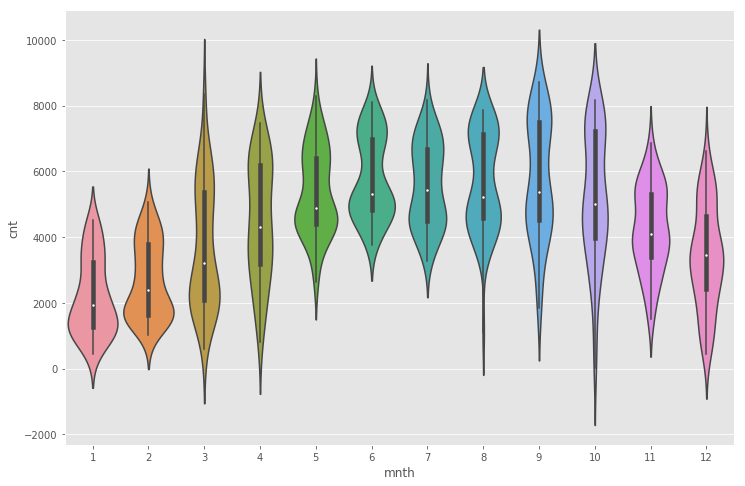

In [19]:
sns.violinplot(df['mnth'], df['cnt'], width=0.9);

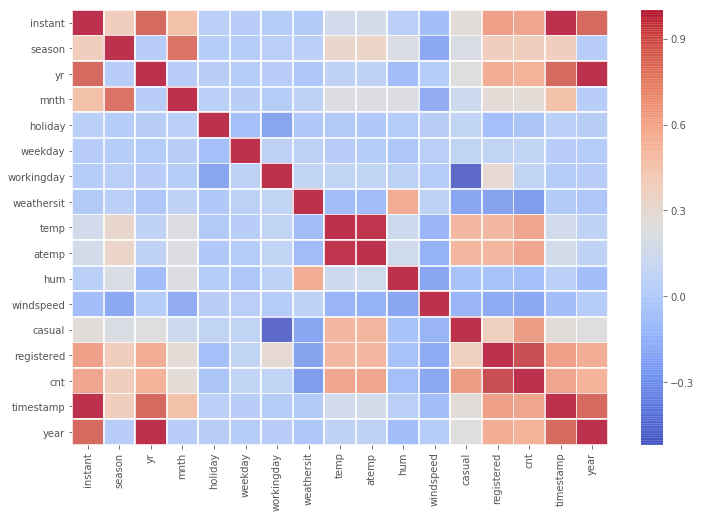

In [20]:
sns.heatmap(df.corr(), cmap = 'coolwarm', alpha = 0.8, linewidth=0.7);

In [11]:
weekday_dynamic = df.groupby('weathersit').sum()['cnt']

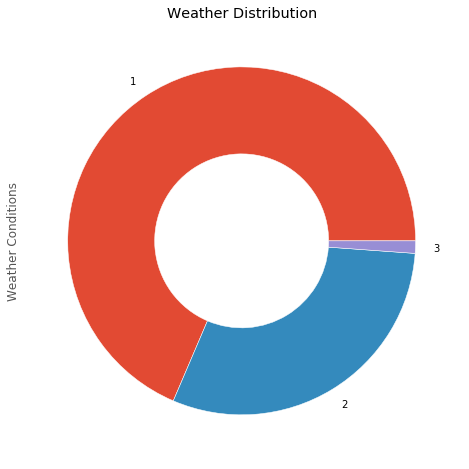

In [21]:
weekday_dynamic.plot(kind='pie', wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Weather Distribution')
plt.ylabel('Weather Conditions')
plt.show()

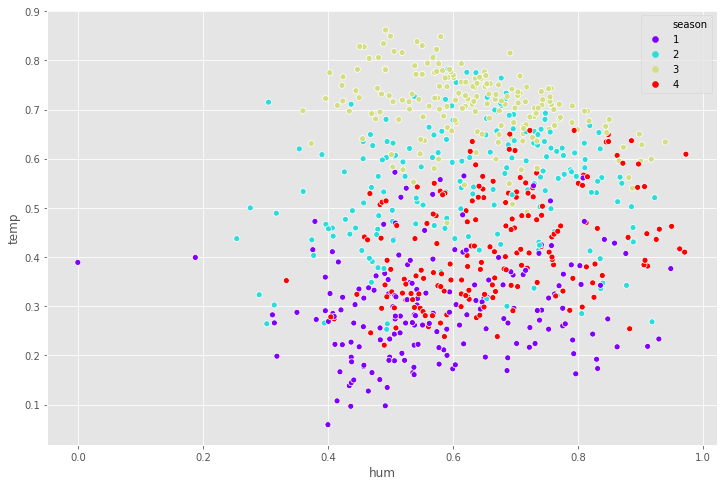

In [22]:
sns.scatterplot(x='hum', y='temp', hue ='season', data = df, palette = 'rainbow');

In [14]:
monthly_dynamic = df.groupby(['year', 'mnth']).sum()['cnt']

In [15]:
monthly_dynamic

year  mnth
2011  1        38189
      2        48215
      3        64045
      4        94870
      5       135821
      6       143512
      7       141341
      8       136691
      9       127418
      10      123511
      11      102167
      12       87323
2012  1        96744
      2       103137
      3       164875
      4       174224
      5       195865
      6       202830
      7       203607
      8       214503
      9       218573
      10      198841
      11      152664
      12      123713
Name: cnt, dtype: int64

In [16]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

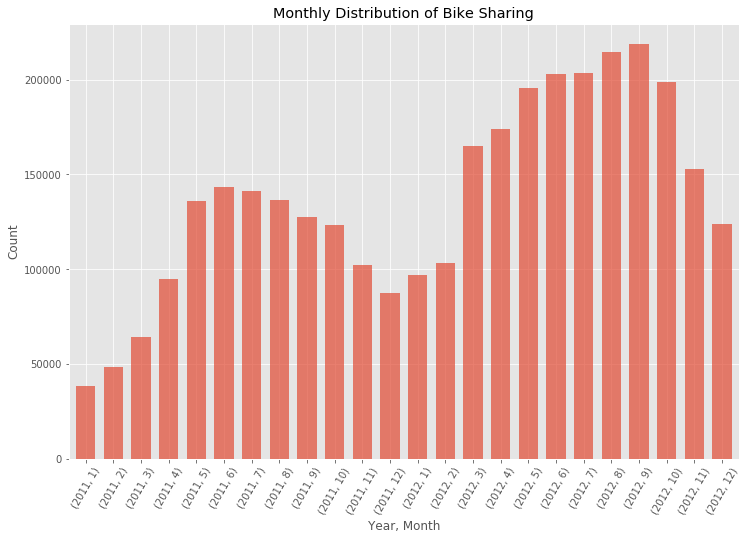

In [23]:
monthly_dynamic.plot(kind='bar', width=0.7, alpha=0.7)
plt.title('Monthly Distribution of Bike Sharing')
plt.ylabel('Count')
plt.xlabel('Year, Month')
plt.xticks(rotation=60)
plt.show()